# Generate D-optimal designs

This notebook contains example code from the article [Two-level designs to estimate all main effects and two-factor interactions](https://doi.org/10.1080/00401706.2016.1142903). by Eendebak, P.T and Schoen, E.D.
This example shows how to generate optimal designs with a user-specified optimization function.

In [1]:
import numpy as np
import oapackage

Define the class of arrays to generate.

In [2]:
N=40 # Run size
k=7 # Number of factors
s=2 # Number of factor levels
strength=2 # Strength of the design
arrayclass=oapackage.arraydata_t(s, N, strength, k)
print('We generate optimal designs with %d rows and %d columns\n' % (N, k) )

We generate optimal designs with 40 rows and 7 columns



Generate a single D-optimal design using $\alpha=(1,2,0)$ as the parameters for the optimization function.

In [3]:
alpha=[1,2,0]
scores, design_efficiencies, designs, ngenerated = oapackage.Doptimize(arrayclass, nrestarts=40, optimfunc=alpha, selectpareto=True)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/40
Doptimize: iteration 39/40
Doptim: done (12 arrays, 1.8 [s])


In [4]:
print('\nGenerated %d designs, the efficiencies for these designs are:' % len(designs))
for ii, d in enumerate(designs):
    dd = d.Defficiencies()
    print('array %d: D-efficiency %.4f, Ds-efficiency %.4f' % (ii, dd[0], dd[1]) )

D=[d.Defficiency() for d in designs]
best=np.argmax(D)
print('\nThe design with the highest D-efficiency (%.4f) is:\n' % D[best] )

designs[best].transposed().showarraycompact()


Generated 12 designs, the efficiencies for these designs are:
array 0: D-efficiency 0.8815, Ds-efficiency 0.9807
array 1: D-efficiency 0.8670, Ds-efficiency 0.9827
array 2: D-efficiency 0.8945, Ds-efficiency 0.9669
array 3: D-efficiency 0.8957, Ds-efficiency 0.9617
array 4: D-efficiency 0.8981, Ds-efficiency 0.9587
array 5: D-efficiency 0.9027, Ds-efficiency 0.9540
array 6: D-efficiency 0.8857, Ds-efficiency 0.9600
array 7: D-efficiency 0.9118, Ds-efficiency 0.9444
array 8: D-efficiency 0.9036, Ds-efficiency 0.9400
array 9: D-efficiency 0.8856, Ds-efficiency 0.9356
array 10: D-efficiency 0.8914, Ds-efficiency 0.9290
array 11: D-efficiency 0.9046, Ds-efficiency 0.9203

The design with the highest D-efficiency (0.9118) is:

1000000010111101010111001100000100111001
1011000100100111111110101010101001010000
1010110111100001111001000111100000100101
1101100100010100111111110101110101000010
0000110110001111011010110110010110110000
1011101000010000011010111011100111110011
010010111111101001011

Pareto: 12 optimal values, 12 objects
index 0: 12 points


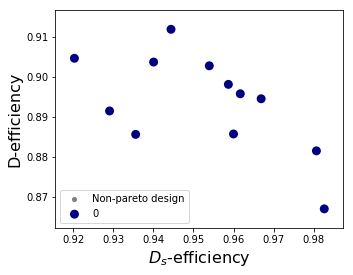

<Figure size 432x288 with 0 Axes>

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fa0ba5f2cf8>,
 'pltlegend': <matplotlib.legend.Legend at 0x7fa0b28eaf60>,
 'xlabelhandle': Text(0.5,26.2,'$D_s$-efficiency')}

In [5]:
from imp import reload
import oapackage.Doptim
reload(oapackage.Doptim)
plot_handles=oapackage.generateDscatter(design_efficiencies, verbose=1)

In [6]:
oapackage.generateDscatter?